<a href="https://colab.research.google.com/github/SLy-Precision/Player-Detection-and-Team-Performance-Prediction/blob/main/02_Scouting_of_Talent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ITAM/df_advanced_metrics.csv')
display(data)

,playerId,playerName,minutesPlayed,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,flow_Eigenvector,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y
0,26289,Javier Güemez López,12245.0,NaN,NaN,0.061669,2.322581,30.490018,83.238056,0.061895,0.362781,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361
1,26306,Adam Fernando Bareiro Gamarra,646.0,NaN,NaN,-0.017304,1.393189,3.571429,55.309598,0.075803,0.243826,1.045464,-0.976956,0.539840,-0.306786,71.272880,51.112406
2,26331,Marcelo Barovero,6062.0,-0.046341,0.276137,-0.001504,0.014847,100.000000,25.966678,0.118342,0.135570,0.593276,0.000000,0.000259,0.180883,8.980487,51.593946
3,27083,Jhon Fredy Duque Arias,264.0,NaN,NaN,0.089816,3.750000,27.272727,40.227273,0.134782,0.177356,1.523000,0.282477,0.351434,0.177032,58.333333,61.990466
4,27967,Unai Bilbao Arteta,10515.0,NaN,NaN,0.070704,0.487874,18.975904,78.992867,0.083221,0.320564,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,450451,Sergio Ismael Hernández Flores,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1230,466093,Kevin Ascary Borges Gaytán,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1231,466094,Emiliano Villaseñor Capetillo,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1232,445696,José Ángel Quiroz López,0.0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN


# Dimensionality Reduction

## UMAP

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,minutesPlayed
0,-0.287041,9.103673,-1.407286,12.847426,11.797585,12245.0
1,6.251046,0.294438,-0.876214,-0.300226,7.499656,646.0
2,-1.862702,9.469714,6.687897,0.286459,-1.758348,6062.0
3,7.867242,6.894016,3.142853,1.570588,7.742532,264.0
4,-1.698395,11.895756,1.353432,7.828358,0.941481,10515.0


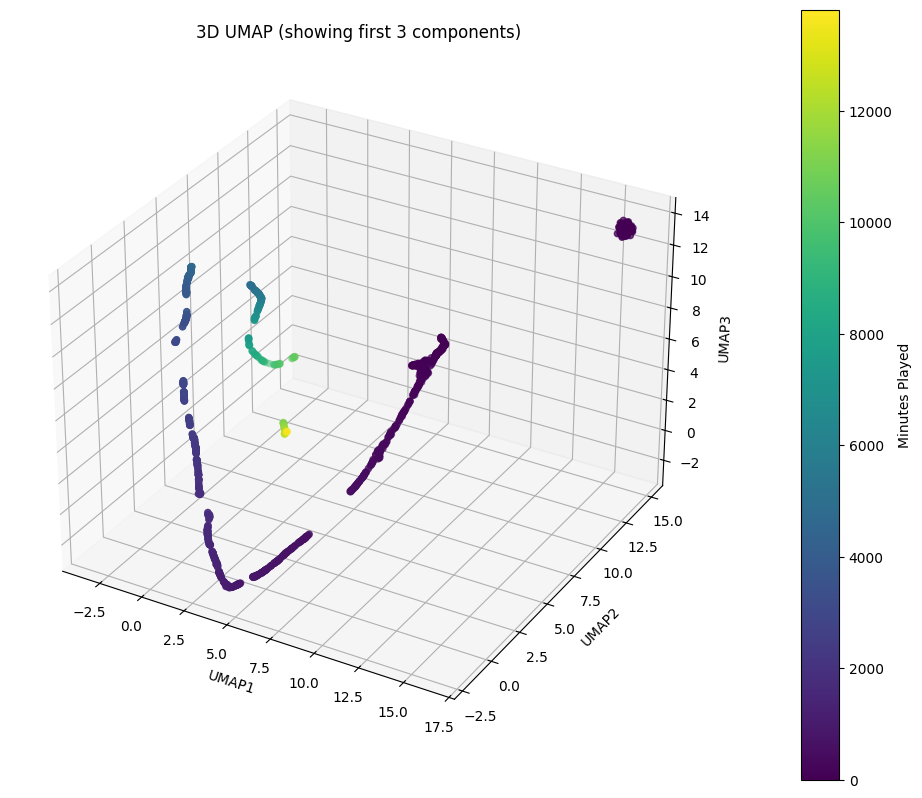

In [ ]:
#Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['playerId', 'X', 'Y'], errors='ignore')

#Handle missing values - fill with mean or median, or drop rows/columns
numerical_data = numerical_data.fillna(numerical_data.mean())

#Initialize UMAP
reducer = umap.UMAP(n_components=5, random_state=42)
#Fit and transform the data
embedding = reducer.fit_transform(numerical_data)

#Create a DataFrame for the UMAP embedding with 5 columns
embedding_df = pd.DataFrame(embedding, columns=[f'UMAP{i+1}' for i in range(5)])

#Add 'minutesPlayed' to the embedding DataFrame for coloring
embedding_df['minutesPlayed'] = data['minutesPlayed']

#Visualize
display(embedding_df.head())

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_df['UMAP1'], embedding_df['UMAP2'], embedding_df['UMAP3'], c=embedding_df['minutesPlayed'], cmap='viridis')
ax.set_title('3D UMAP (showing first 3 components)')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Minutes Played')

plt.show()

In [ ]:
embedding_df.shape

(1234, 6)

In [ ]:
#Concat both dataframes
data_with_embedding = pd.concat([data, embedding_df], axis=1)
data_with_embedding.head()

,playerId,playerName,minutesPlayed,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,...,off_OpportunityCreation_p90,off_OBV_p90,X,Y,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,minutesPlayed
0,26289,Javier Güemez López,12245.0,NaN,NaN,0.061669,2.322581,30.490018,83.238056,0.061895,...,0.108541,0.115444,47.839276,45.516361,-0.287041,9.103673,-1.407286,12.847426,11.797585,12245.0
1,26306,Adam Fernando Bareiro Gamarra,646.0,NaN,NaN,-0.017304,1.393189,3.571429,55.309598,0.075803,...,0.539840,-0.306786,71.272880,51.112406,6.251046,0.294438,-0.876214,-0.300226,7.499656,646.0
2,26331,Marcelo Barovero,6062.0,-0.046341,0.276137,-0.001504,0.014847,100.000000,25.966678,0.118342,...,0.000259,0.180883,8.980487,51.593946,-1.862702,9.469714,6.687897,0.286459,-1.758348,6062.0
3,27083,Jhon Fredy Duque Arias,264.0,NaN,NaN,0.089816,3.750000,27.272727,40.227273,0.134782,...,0.351434,0.177032,58.333333,61.990466,7.867242,6.894016,3.142853,1.570588,7.742532,264.0
4,27967,Unai Bilbao Arteta,10515.0,NaN,NaN,0.070704,0.487874,18.975904,78.992867,0.083221,...,0.104052,0.092572,33.347201,32.226776,-1.698395,11.895756,1.353432,7.828358,0.941481,10515.0


In [ ]:
data.columns

Index(['playerId', 'playerName', 'minutesPlayed', 'gk_GoalsPrevented_p90',
       'gk_AvgSaveDifficulty', 'def_OBV_p90', 'def_OppHalfRecoveries_p90',
       'def_DuelWinRate', 'flow_WeightedDegree_p90', 'flow_Betweenness',
       'flow_Eigenvector', 'off_xGChain_p90', 'off_FinishingDifferential',
       'off_OpportunityCreation_p90', 'off_OBV_p90', 'X', 'Y'],
      dtype='object')

## T-SNE

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


,TSNE1,TSNE2,TSNE3,playerId,minutesPlayed
0,12.441009,-0.021711,-0.105728,26289,12245.0
1,-5.283295,-0.068949,2.578839,26306,646.0
2,5.761209,-0.395105,-0.292631,26331,6062.0
3,-10.434213,-0.091822,-1.820035,27083,264.0
4,10.089309,0.018188,-0.346806,27967,10515.0


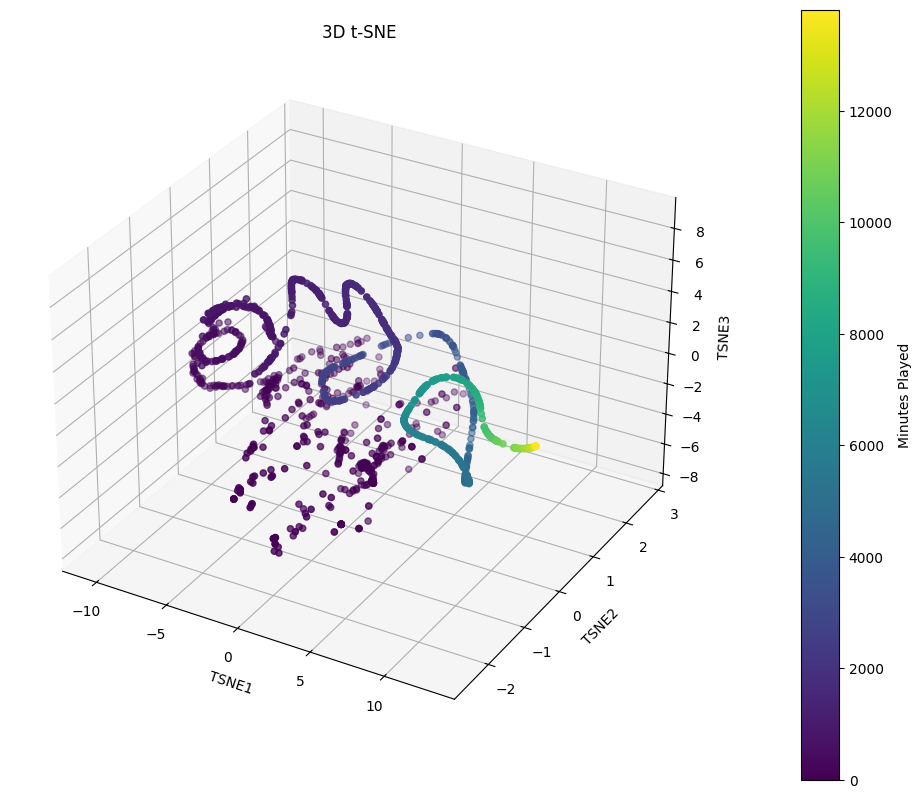

In [ ]:
from sklearn.manifold import TSNE

#Reduce to 3 components for 3D visualization
tsne_reducer = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300) # Perplexity and n_iter are common parameters to tune

tsne_embedding = tsne_reducer.fit_transform(numerical_data)
tsne_embedding_df = pd.DataFrame(tsne_embedding, columns=[f'TSNE{i+1}' for i in range(3)])
#Add 'playerId' and 'minutesPlayed' to the embedding DataFrame
tsne_embedding_df['playerId'] = data['playerId']
tsne_embedding_df['minutesPlayed'] = data['minutesPlayed']

display(tsne_embedding_df.head())

#Visualize
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
#'minutesPlayed' for coloring
scatter = ax.scatter(tsne_embedding_df['TSNE1'], tsne_embedding_df['TSNE2'], tsne_embedding_df['TSNE3'], c=tsne_embedding_df['minutesPlayed'], cmap='viridis')
ax.set_title('3D t-SNE')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Minutes Played')
plt.show()

In [ ]:
data_with_tsne_embedding = pd.concat([data, tsne_embedding_df], axis=1)
data_with_tsne_embedding.head()

,playerId,playerName,minutesPlayed,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,...,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,TSNE1,TSNE2,TSNE3,minutesPlayed
0,26289,Javier Güemez López,12245.0,NaN,NaN,0.061669,2.322581,30.490018,83.238056,0.061895,...,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361,12.441009,-0.021711,-0.105728,12245.0
1,26306,Adam Fernando Bareiro Gamarra,646.0,NaN,NaN,-0.017304,1.393189,3.571429,55.309598,0.075803,...,1.045464,-0.976956,0.539840,-0.306786,71.272880,51.112406,-5.283295,-0.068949,2.578839,646.0
2,26331,Marcelo Barovero,6062.0,-0.046341,0.276137,-0.001504,0.014847,100.000000,25.966678,0.118342,...,0.593276,0.000000,0.000259,0.180883,8.980487,51.593946,5.761209,-0.395105,-0.292631,6062.0
3,27083,Jhon Fredy Duque Arias,264.0,NaN,NaN,0.089816,3.750000,27.272727,40.227273,0.134782,...,1.523000,0.282477,0.351434,0.177032,58.333333,61.990466,-10.434213,-0.091822,-1.820035,264.0
4,27967,Unai Bilbao Arteta,10515.0,NaN,NaN,0.070704,0.487874,18.975904,78.992867,0.083221,...,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776,10.089309,0.018188,-0.346806,10515.0


## PCA

,PC1,PC2,PC3,minutesPlayed
0,2.621843,-1.758375,-0.583234,12245.0
1,-1.066090,0.999732,-0.205070,646.0
2,-0.068918,-2.832339,-1.848698,6062.0
3,-0.625286,0.287585,-0.906860,264.0
4,1.590495,-1.657841,-0.744074,10515.0


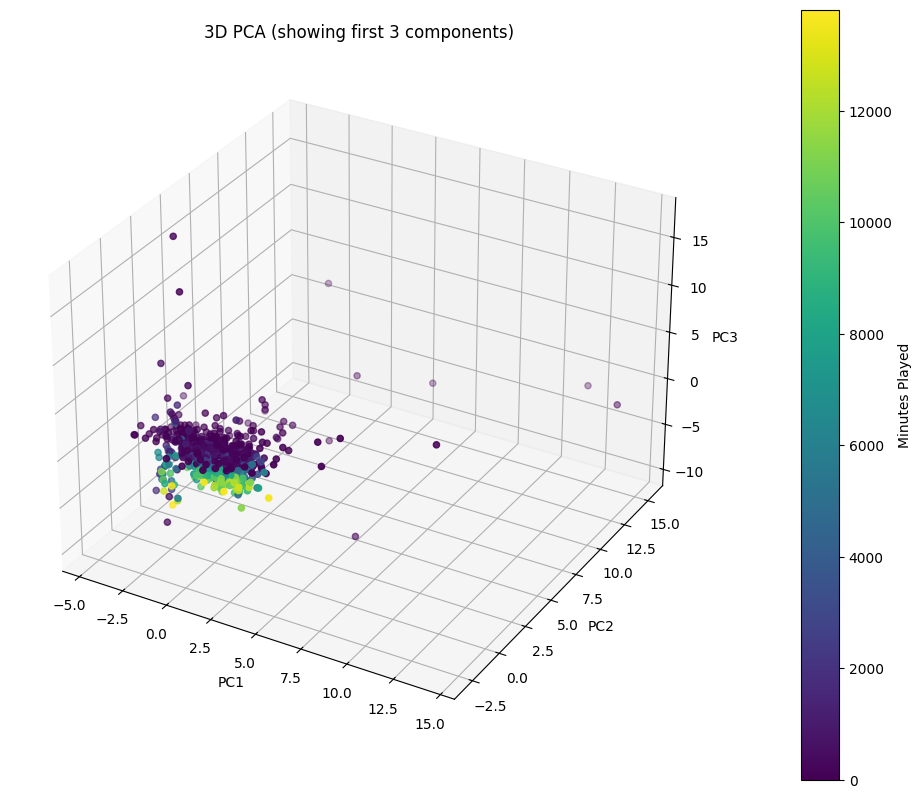

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Scale the numerical data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

#Reduce to 3 components for 3D visualization
pca_reducer = PCA(n_components=3, random_state=42)

#Fit and transform the scaled data
pca_embedding = pca_reducer.fit_transform(scaled_numerical_data)
pca_embedding_df = pd.DataFrame(pca_embedding, columns=[f'PC{i+1}' for i in range(3)])

#'minutesPlayed' for coloring
pca_embedding_df['minutesPlayed'] = data['minutesPlayed']
display(pca_embedding_df.head())

# Visualize
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_embedding_df['PC1'], pca_embedding_df['PC2'], pca_embedding_df['PC3'], c=pca_embedding_df['minutesPlayed'], cmap='viridis')
ax.set_title('3D PCA (showing first 3 components)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Minutes Played')
plt.show()

In [ ]:
data_with_pca_embedding = pd.concat([data, pca_embedding_df], axis=1)
data_with_pca_embedding.head()

,playerId,playerName,minutesPlayed,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,...,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,PC1,PC2,PC3,minutesPlayed
0,26289,Javier Güemez López,12245.0,NaN,NaN,0.061669,2.322581,30.490018,83.238056,0.061895,...,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361,2.621843,-1.758375,-0.583234,12245.0
1,26306,Adam Fernando Bareiro Gamarra,646.0,NaN,NaN,-0.017304,1.393189,3.571429,55.309598,0.075803,...,1.045464,-0.976956,0.539840,-0.306786,71.272880,51.112406,-1.066090,0.999732,-0.205070,646.0
2,26331,Marcelo Barovero,6062.0,-0.046341,0.276137,-0.001504,0.014847,100.000000,25.966678,0.118342,...,0.593276,0.000000,0.000259,0.180883,8.980487,51.593946,-0.068918,-2.832339,-1.848698,6062.0
3,27083,Jhon Fredy Duque Arias,264.0,NaN,NaN,0.089816,3.750000,27.272727,40.227273,0.134782,...,1.523000,0.282477,0.351434,0.177032,58.333333,61.990466,-0.625286,0.287585,-0.906860,264.0
4,27967,Unai Bilbao Arteta,10515.0,NaN,NaN,0.070704,0.487874,18.975904,78.992867,0.083221,...,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776,1.590495,-1.657841,-0.744074,10515.0


In [ ]:
from sklearn.metrics import pairwise_distances

#Calculate the Euclidean distance matrix for the original numerical data
original_distance_matrix = pairwise_distances(numerical_data, metric='euclidean')

## Calcular matrices de distancia para umap y t-sne

In [ ]:
from sklearn.metrics import pairwise_distances

#Excluding 'minutesPlayed' beacuse it was added for visualization
umap_embedding_only = embedding_df.drop(columns=['minutesPlayed'])
tsne_embedding_only = tsne_embedding_df.drop(columns=['minutesPlayed'])

#Calculate the Euclidean distance matrix for the embeddings
umap_distance_matrix = pairwise_distances(umap_embedding_only, metric='euclidean')
tsne_distance_matrix = pairwise_distances(tsne_embedding_only, metric='euclidean')

Matrices de distancia para UMAP y t-SNE calculadas.


In [ ]:
from scipy.stats import spearmanr, kendalltau
import numpy as np

def get_upper_triangle_flat(matrix):
    #Get the indices of the upper triangle (excluding the diagonal)
    upper_triangle_indices = np.triu_indices_from(matrix, k=1)
    return matrix[upper_triangle_indices]

original_distances_flat = get_upper_triangle_flat(original_distance_matrix)
umap_distances_flat = get_upper_triangle_flat(umap_distance_matrix)
tsne_distances_flat = get_upper_triangle_flat(tsne_distance_matrix)

#Calculate Spearman's rank correlation
spearman_umap, _ = spearmanr(original_distances_flat, umap_distances_flat)
spearman_tsne, _ = spearmanr(original_distances_flat, tsne_distances_flat)

#Calculate Kendall's rank correlation
kendall_umap, _ = kendalltau(original_distances_flat, umap_distances_flat)
kendall_tsne, _ = kendalltau(original_distances_flat, tsne_distances_flat)

print(f"Spearman rank correlation between original distances and UMAP: {spearman_umap:.4f}")
print(f"Spearman rank correlation between original distances and t-SNE: {spearman_tsne:.4f}")
print(f"Kendall rank correlation between original distances and UMAP: {kendall_umap:.4f}")
print(f"Kendall rank correlation between original distances and t-SNE: {kendall_tsne:.4f}")

Correlación de rangos de Spearman entre distancias originales y UMAP: 0.4040
Correlación de rangos de Spearman entre distancias originales y t-SNE: 0.5294
Correlación de rangos de Kendall entre distancias originales y UMAP: 0.3034
Correlación de rangos de Kendall entre distancias originales y t-SNE: 0.3717


t-SNE preserves better de distances, so we´ll stick with it for de similarity test

# Clusters

We get the clusters obtained with the K-Means algorithm so that the recommendations are from players of the same role.

In [ ]:
cluster_data = pd.read_csv('/content/drive/MyDrive/ITAM/df_clusters.csv')
cluster_data.head()

,playerId,playerName,minutesPlayed,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,flow_Eigenvector,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,cluster
0,26289,Javier Güemez López,12245.0,0.061669,2.322581,30.490018,83.238056,0.061895,0.362781,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361,1
1,27967,Unai Bilbao Arteta,10515.0,0.070704,0.487874,18.975904,78.992867,0.083221,0.320564,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776,7
2,28056,Juan David Castro Ruiz,1863.0,0.035866,2.318841,24.324324,62.077295,0.082698,0.273098,1.958940,-0.219814,0.091136,0.051532,56.412127,61.246887,4
3,28160,Ricardo Chávez Soto,12372.0,0.059764,1.636760,22.870662,74.519884,0.086146,0.316725,0.626601,-1.732848,0.165757,0.175998,54.244385,87.358752,5
4,28560,Jair Alberto Díaz Vázquez,7573.0,0.081938,0.879440,26.781857,57.864783,0.077236,0.267364,0.738798,-1.178588,0.045315,0.137455,46.153903,15.881485,6


| Cluster ID | Archetype Name                               | General Position | Profile Description                                                                 |
|------------|----------------------------------------------|------------------|-------------------------------------------------------------------------------------|
| 0          | Creative Attacking Midfielders               | Forward          | High-danger creators who operate highest up the pitch as the final link in the attack. |
| 1          | Control Midfielders (Box-to-Box)             | Midfielder       | The engine room; high-volume passers who are also strong defensively in the middle of the park. |
| 2          | High-Pressing Forwards                       | Forward          | Attackers who act as the first line of defense, specializing in recovering the ball in the opponent's half. |
| 3          | Elite Finishers                              | Forward          | A specialist group of lethal goalscorers who significantly outperform their expected goals. |
| 4          | Offensive Interiors / #10s                   | Midfielder       | The primary creative force from a central attacking midfield position, highly involved in shot-creating possessions. |
| 5          | Right-Sided Full-backs / Wing-backs          | Defender         | All-around contributors who control the entire right flank, contributing to both defense and attack. |
| 6          | Left-Sided Full-backs / Wing-backs           | Defender         | The mirror image of Cluster 5, these players control the entire left flank. |
| 7          | Central Defenders                            | Defender         | Purely defensive players who protect the box and have limited involvement in buildup play. |


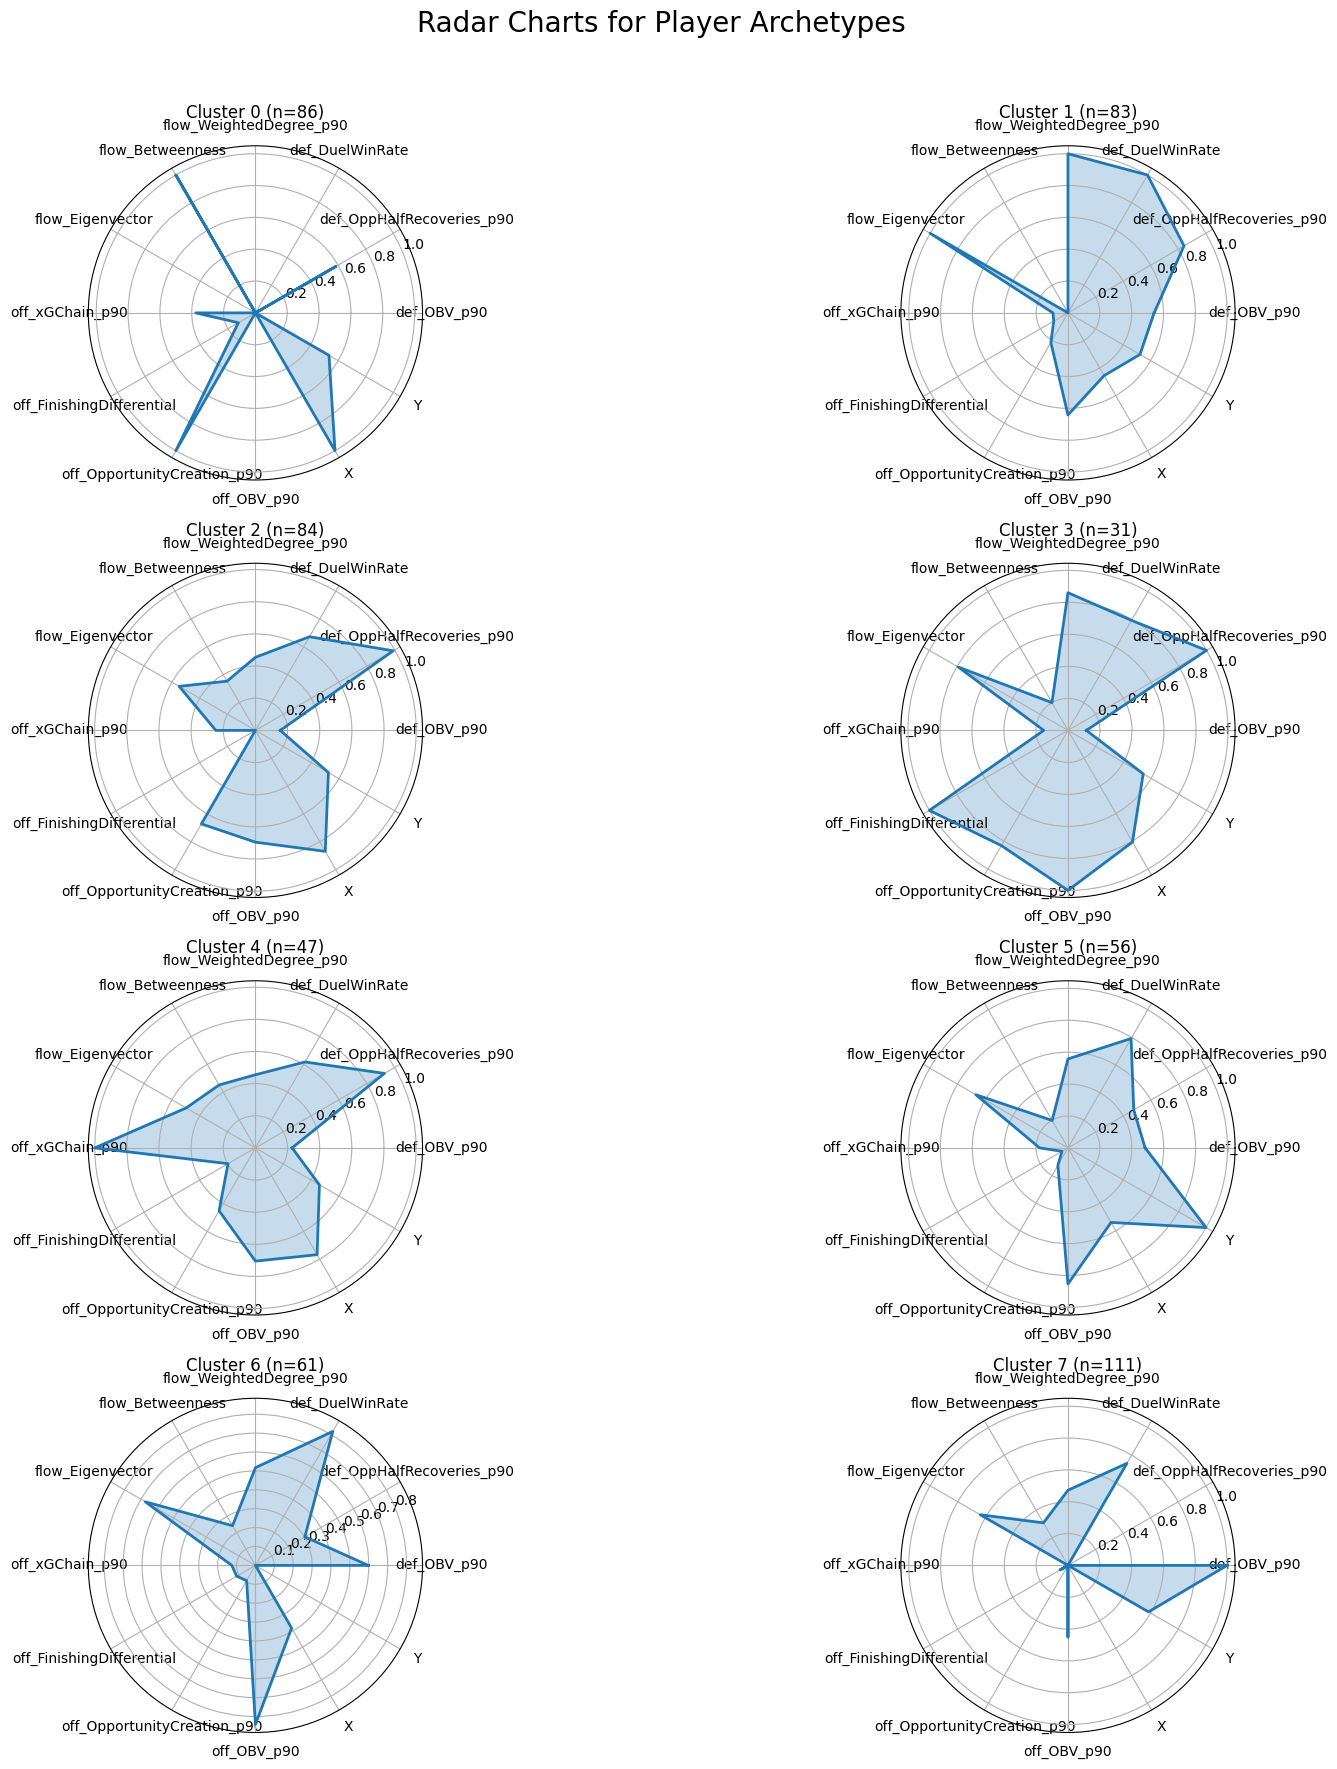

In [ ]:
metrics_by_cluster = {
    0: ["off_xGChain_p90", "off_OpportunityCreation_p90", "off_OBV_p90"],
    1: ["flow_WeightedDegree_p90", "flow_Betweenness", "def_OppHalfRecoveries_p90"],
    2: ["def_OppHalfRecoveries_p90", "def_DuelWinRate"],
    3: ["off_xGChain_p90", "off_FinishingDifferential", "off_OBV_p90"],
    4: ["off_OpportunityCreation_p90", "flow_WeightedDegree_p90"],
    5: ["def_OBV_p90", "def_DuelWinRate", "flow_WeightedDegree_p90", "off_OpportunityCreation_p90"],
    6: ["def_OBV_p90", "def_DuelWinRate", "flow_WeightedDegree_p90", "off_OpportunityCreation_p90"],
    7: ["def_OBV_p90", "def_DuelWinRate", "gk_GoalsPrevented_p90"],
    }

Obtenemos toda la [plantilla del equipo](https://www.clubamerica.com.mx/plantilla-varonil)

In [ ]:
#First we make sure the names fit with the ones in the CSV file

porteros = [
    "Luis Ángel Malagón Velázquez",
    "Rodolfo Cota Robles"
]

defensas = [
    "Israel Reyes Romero",
    "Sebastián Enzo Cáceres Ramos",
    "Kevin Oswaldo Picón Álvarez",
    "Néstor Alejandro Araújo Razo",
    "Ralph Orquin",
    "Cristian Alexis Borja González",
    "Ramón Juárez Del Castillo",
    "Igor Lichnovsky Osorio",
    "Miguel Ángel Vázquez García",
    "Dagoberto Espinoza Acosta"
]

centrocampistas = [
    "Eduardo Gabriel dos Santos Bauermann",
    "Álvaro Fidalgo Fernández",
    "Alejandro Zendejas Saavedra",
    "Alan Jhosué Cervantes Martín del Campo",
    "José Raúl Zúñiga Murillo",
    "Alexis Hazael Gutiérrez Torres",
    "Erick Daniel Sánchez Ocegueda",
    "Antonio Álvarez Villar",
    "Aarón Arredondo Ángel",
    "Diego Osvaldo Arriaga García"
]

delanteros = [
    "Brian Alejandro Rubio Rodríguez",
    "Henry Josué Martín Mex",
    "Víctor Alejandro Dávila Zavala",
    "Isaías Violante Romero",
    "Rodrigo Sebastián Aguirre Soto",
    "Patricio Salas"
]

todos_los_nombres = porteros + defensas + centrocampistas + delanteros
plantilla_america_nombres = pd.DataFrame(todos_los_nombres, columns=['playerName'])
display(plantilla_america_nombres)

,playerName
0,Luis Ángel Malagón Velázquez
1,Rodolfo Cota Robles
2,Israel Reyes Romero
3,Sebastián Enzo Cáceres Ramos
4,Kevin Oswaldo Picón Álvarez
5,Néstor Alejandro Araújo Razo
6,Ralph Orquin
7,Cristian Alexis Borja González
8,Ramón Juárez Del Castillo
9,Igor Lichnovsky Osorio


In [ ]:
plantilla_america = pd.merge(
plantilla_america_nombres,
data[['playerName', 'playerId']],
on='playerName',
how='left'
)

display(plantilla_america)

,playerName,playerId
0,Luis Ángel Malagón Velázquez,33098
1,Rodolfo Cota Robles,28522
2,Israel Reyes Romero,33126
3,Sebastián Enzo Cáceres Ramos,35690
4,Kevin Oswaldo Picón Álvarez,365522
5,Néstor Alejandro Araújo Razo,11388
6,Ralph Orquin,330534
7,Cristian Alexis Borja González,23428
8,Ramón Juárez Del Castillo,36167
9,Igor Lichnovsky Osorio,26256


# Proposing player changes for the America Team

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ITAM/df_advanced_metrics.csv')
cluster_data = pd.read_csv('/content/drive/MyDrive/ITAM/df_clusters.csv')
display(data.head())
display(cluster_data.head())

,playerId,playerName,minutesPlayed,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,flow_Eigenvector,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y
0,26289,Javier Güemez López,12245.0,NaN,NaN,0.061669,2.322581,30.490018,83.238056,0.061895,0.362781,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361
1,26306,Adam Fernando Bareiro Gamarra,646.0,NaN,NaN,-0.017304,1.393189,3.571429,55.309598,0.075803,0.243826,1.045464,-0.976956,0.539840,-0.306786,71.272880,51.112406
2,26331,Marcelo Barovero,6062.0,-0.046341,0.276137,-0.001504,0.014847,100.000000,25.966678,0.118342,0.135570,0.593276,0.000000,0.000259,0.180883,8.980487,51.593946
3,27083,Jhon Fredy Duque Arias,264.0,NaN,NaN,0.089816,3.750000,27.272727,40.227273,0.134782,0.177356,1.523000,0.282477,0.351434,0.177032,58.333333,61.990466
4,27967,Unai Bilbao Arteta,10515.0,NaN,NaN,0.070704,0.487874,18.975904,78.992867,0.083221,0.320564,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776


,playerId,playerName,minutesPlayed,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,flow_Eigenvector,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,cluster
0,26289,Javier Güemez López,12245.0,0.061669,2.322581,30.490018,83.238056,0.061895,0.362781,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361,1
1,27967,Unai Bilbao Arteta,10515.0,0.070704,0.487874,18.975904,78.992867,0.083221,0.320564,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776,7
2,28056,Juan David Castro Ruiz,1863.0,0.035866,2.318841,24.324324,62.077295,0.082698,0.273098,1.958940,-0.219814,0.091136,0.051532,56.412127,61.246887,4
3,28160,Ricardo Chávez Soto,12372.0,0.059764,1.636760,22.870662,74.519884,0.086146,0.316725,0.626601,-1.732848,0.165757,0.175998,54.244385,87.358752,5
4,28560,Jair Alberto Díaz Vázquez,7573.0,0.081938,0.879440,26.781857,57.864783,0.077236,0.267364,0.738798,-1.178588,0.045315,0.137455,46.153903,15.881485,6


In [ ]:
data = data.fillna(data.mean(numeric_only=True))
data_indexed = data.set_index('playerId')
cluster_data_indexed = cluster_data.set_index('playerId')
display(data_indexed.head())
display(cluster_data_indexed.head())

,playerName,minutesPlayed,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,flow_Eigenvector,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y
playerId,,,,,,,,,,,,,,,,
26289,Javier Güemez López,12245.0,-0.121397,0.305709,0.061669,2.322581,30.490018,83.238056,0.061895,0.362781,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361
26306,Adam Fernando Bareiro Gamarra,646.0,-0.121397,0.305709,-0.017304,1.393189,3.571429,55.309598,0.075803,0.243826,1.045464,-0.976956,0.539840,-0.306786,71.272880,51.112406
26331,Marcelo Barovero,6062.0,-0.046341,0.276137,-0.001504,0.014847,100.000000,25.966678,0.118342,0.135570,0.593276,0.000000,0.000259,0.180883,8.980487,51.593946
27083,Jhon Fredy Duque Arias,264.0,-0.121397,0.305709,0.089816,3.750000,27.272727,40.227273,0.134782,0.177356,1.523000,0.282477,0.351434,0.177032,58.333333,61.990466
27967,Unai Bilbao Arteta,10515.0,-0.121397,0.305709,0.070704,0.487874,18.975904,78.992867,0.083221,0.320564,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776


,playerName,minutesPlayed,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,flow_Eigenvector,off_xGChain_p90,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,cluster
playerId,,,,,,,,,,,,,,,
26289,Javier Güemez López,12245.0,0.061669,2.322581,30.490018,83.238056,0.061895,0.362781,0.625671,2.445816,0.108541,0.115444,47.839276,45.516361,1
27967,Unai Bilbao Arteta,10515.0,0.070704,0.487874,18.975904,78.992867,0.083221,0.320564,0.610632,4.307800,0.104052,0.092572,33.347201,32.226776,7
28056,Juan David Castro Ruiz,1863.0,0.035866,2.318841,24.324324,62.077295,0.082698,0.273098,1.958940,-0.219814,0.091136,0.051532,56.412127,61.246887,4
28160,Ricardo Chávez Soto,12372.0,0.059764,1.636760,22.870662,74.519884,0.086146,0.316725,0.626601,-1.732848,0.165757,0.175998,54.244385,87.358752,5
28560,Jair Alberto Díaz Vázquez,7573.0,0.081938,0.879440,26.781857,57.864783,0.077236,0.267364,0.738798,-1.178588,0.045315,0.137455,46.153903,15.881485,6


In [ ]:
#Find replacements for every player in plantilla_america
players_to_replace = plantilla_america['playerName']

In [ ]:
#Join original data with the t-SNE embedding for both the original dataframe and the America´s team roster

merged_data = pd.merge(data, tsne_embedding_df, on='playerId', how='left')
final_merged_data = pd.merge(merged_data, cluster_data[['playerId', 'cluster']], on='playerId', how='inner')
display(final_merged_data.head(2))

#Only America´s roster
america_players_data = final_merged_data[final_merged_data['playerId'].isin(plantilla_america['playerId'])]
display(america_players_data.head(2))

,playerId,playerName,minutesPlayed_x,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,...,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,TSNE1,TSNE2,TSNE3,minutesPlayed_y,cluster
0,26289,Javier Güemez López,12245.0,-0.121397,0.305709,0.061669,2.322581,30.490018,83.238056,0.061895,...,2.445816,0.108541,0.115444,47.839276,45.516361,12.441009,-0.021711,-0.105728,12245.0,1
1,27967,Unai Bilbao Arteta,10515.0,-0.121397,0.305709,0.070704,0.487874,18.975904,78.992867,0.083221,...,4.307800,0.104052,0.092572,33.347201,32.226776,10.089309,0.018188,-0.346806,10515.0,7


,playerId,playerName,minutesPlayed_x,gk_GoalsPrevented_p90,gk_AvgSaveDifficulty,def_OBV_p90,def_OppHalfRecoveries_p90,def_DuelWinRate,flow_WeightedDegree_p90,flow_Betweenness,...,off_FinishingDifferential,off_OpportunityCreation_p90,off_OBV_p90,X,Y,TSNE1,TSNE2,TSNE3,minutesPlayed_y,cluster
33,34326,Brian Alejandro Rubio Rodríguez,5004.0,-0.121397,0.305709,0.020715,2.697842,8.724832,59.640288,0.106865,...,-4.185918,0.334156,-0.126282,66.331506,51.751690,7.882909,0.215517,-4.133352,5004.0,0
83,30944,Víctor Alejandro Dávila Zavala,7116.0,-0.121397,0.305709,0.045930,2.301855,17.112299,64.186341,0.105960,...,2.743619,0.492580,0.082555,65.491988,48.675433,6.393983,-0.543365,2.943349,7116.0,2


In [ ]:
def find_similar_players(player_id, data_df, tsne_cols, n_recommendations):
    """
    Finds players similar to a given player based on t-SNE embedding and cosine similarity.
    Filters it so that only gets players in the same cluster.

    Args:
        player_id (int): The ID of the player for whom to find similar players.
        data_df (pd.DataFrame): The DataFrame containing player data, t-SNE embeddings, and cluster information.
        tsne_cols (list): A list of column names corresponding to the t-SNE embeddings.
        n_recommendations (int): The number of similar players to recommend.

    Returns:
        pd.DataFrame: A DataFrame containing the top similar players and their similarity scores.
    """
    #Retrieve the cluster ID of the input player
    player_cluster = data_df[data_df['playerId'] == player_id]['cluster'].iloc[0]

    #Filter data_df for players in the same cluster, excluding the input player
    same_cluster_players = data_df[(data_df['cluster'] == player_cluster) & (data_df['playerId'] != player_id)].copy()

    #Extract t-SNE embedding for the input player
    player_tsne_embedding = data_df[data_df['playerId'] == player_id][tsne_cols].values
    #Extract t-SNE embeddings for players in the same cluster
    same_cluster_tsne_embeddings = same_cluster_players[tsne_cols].values

    #🧠 Calculate cosine similarity
    similarity_scores = cosine_similarity(player_tsne_embedding, same_cluster_tsne_embeddings)
    similarity_df = pd.DataFrame({
        'playerId': same_cluster_players['playerId'],
        'playerName': same_cluster_players['playerName'],
        'similarity_score': similarity_scores[0]
    }).set_index('playerId')

    #sort
    sorted_similarity_df = similarity_df.sort_values(by='similarity_score', ascending=False)
    return sorted_similarity_df.head(n_recommendations)

In [ ]:
#Ensure that the players to replace are present in the final_merged_data DataFrame
players_to_replace_filtered = [
    player_name for player_name in players_to_replace
    if player_name in final_merged_data['playerName'].values
]
#Define the list of t-SNE embedding columns
tsne_embedding_cols = [f'TSNE{i+1}' for i in range(3)]

n_recommendations = 5

recommendations = {}

#Iterate through the players to replace
for player_name in players_to_replace_filtered:
    #Find the playerId for the current player
    player_id_to_replace = final_merged_data[final_merged_data['playerName'] == player_name]['playerId'].iloc[0]

    #Find similar players using the defined function
    similar_players_df = find_similar_players(player_id_to_replace, final_merged_data, tsne_embedding_cols, n_recommendations)
    recommendations[player_name] = similar_players_df

# Display the recommendations for each player
for player_name, rec_df in recommendations.items():
    print(f"\nRecommendations for {player_name}:")
    display(rec_df)


Recommendations for Israel Reyes Romero:


,playerName,similarity_score
playerId,,
43476,Victor Andrés Guzmán Olmedo,0.999999
32916,Diego Eduardo De Buen Juárez,0.999974
26268,Alexis Francisco Peña López,0.999963
6794,Gustavo Daniel Cabral Cáceres,0.999778
43553,Emanuel Gularte Méndez,0.999777



Recommendations for Sebastián Enzo Cáceres Ramos:


,playerName,similarity_score
playerId,,
27948,Kevin Rafael Escamilla Moreno,0.999987
5738,Anderson Santamaría Bardales,0.999907
133836,Arturo Ortíz Martínez,0.995216
26256,Igor Lichnovsky Osorio,0.994984
33113,Facundo Ezequiel Almada,0.994786



Recommendations for Néstor Alejandro Araújo Razo:


,playerName,similarity_score
playerId,,
26302,Hugo Isaac Rodríguez De La O,0.998786
48870,Moises Castillo Mosquera,0.997981
27888,José Juan Vázquez Gómez,0.989892
36296,Fabricio Orosmán Formiliano Duarte,0.981356
43309,Alán Isidro Montes Castro,0.979890



Recommendations for Ralph Orquin:


,playerName,similarity_score
playerId,,
78286,Lucas Jaques Varone Maia,0.996220
34990,Raúl Martín Sandoval Zavala,0.987052
31750,Robert Ismael Ergas Moreno,0.975048
52290,Daniel Alonso Aceves Patiño,0.960746
30024,Jesús Alejandro Gómez Molina,0.957106



Recommendations for Cristian Alexis Borja González:


,playerName,similarity_score
playerId,,
28173,Aníbal Hernán Chalá Ayoví,0.999447
43326,Erik Vera Franco,0.988215
43317,Jerónimo Rodríguez Guemes,0.984184
34373,Jonathan Ezequiel Perlaza Leiva,0.959834
28560,Jair Alberto Díaz Vázquez,0.944560



Recommendations for Ramón Juárez Del Castillo:


,playerName,similarity_score
playerId,,
37359,Roberto Ismael Meraz Bernal,0.999918
133836,Arturo Ortíz Martínez,0.995928
5738,Anderson Santamaría Bardales,0.995531
26256,Igor Lichnovsky Osorio,0.995345
33113,Facundo Ezequiel Almada,0.994864



Recommendations for Igor Lichnovsky Osorio:


,playerName,similarity_score
playerId,,
33113,Facundo Ezequiel Almada,0.999988
133836,Arturo Ortíz Martínez,0.999980
131162,José Juan García Manríquez,0.999065
44068,Nathanael Ananias da Silva,0.997235
36167,Ramón Juárez Del Castillo,0.995345



Recommendations for Miguel Ángel Vázquez García:


,playerName,similarity_score
playerId,,
427772,Jonathan Geovanni Pérez Sánchez,0.999905
274863,Rodrigo Armando González Cárdenas,0.999809
8818,Jorge Meré Pérez,0.999310
31434,Carlos Alejandro Robles Jiménez,0.999288
18904,Claudio Matías Kranevitter,0.994828



Recommendations for Dagoberto Espinoza Acosta:


,playerName,similarity_score
playerId,,
406600,Ramiro Franco Zambrano,1.000000
367199,Román Torres Acosta,0.999861
28869,Julio César González Trinidad,0.994751
36168,Jair Omar Cortés Álvarez,0.991992
29516,Idekel Alberto Domínguez Rodríguez,0.990122



Recommendations for Eduardo Gabriel dos Santos Bauermann:


,playerName,similarity_score
playerId,,
399885,Jose Rodrigo Pachuca Martinez,0.999600
28943,Víctor Gustavo Velázquez Ramos,0.999577
35976,Gonzalo Gastón Freitas Silva,0.999562
136587,Rafael Guerrero Ramirez,0.999492
386286,Norman Andres Micolta Arroyo,0.999271



Recommendations for Álvaro Fidalgo Fernández:


,playerName,similarity_score
playerId,,
27153,Javier Ignacio Aquino Carmona,0.999940
27904,Fernando Gorriarán Fontes,0.999789
43555,Erick Daniel Sánchez Ocegueda,0.999778
6715,Guido Hernán Pizarro,0.999755
26289,Javier Güemez López,0.999732



Recommendations for Alejandro Zendejas Saavedra:


,playerName,similarity_score
playerId,,
5576,Jesús Daniel Gallardo Vasconcelos,0.999999
26796,Pablo Edson Barrera Acosta,0.999996
26375,Roberto Carlos Alvarado Hernández,0.999964
26369,Diego Alfonso Valdés Contreras,0.999738
28538,José Ignacio Rivero Segade,0.999685



Recommendations for Alan Jhosué Cervantes Martín del Campo:


,playerName,similarity_score
playerId,,
26289,Javier Güemez López,0.999999
43622,Erik Antonio Lira Méndez,0.999999
6715,Guido Hernán Pizarro,0.999998
43555,Erick Daniel Sánchez Ocegueda,0.999996
27904,Fernando Gorriarán Fontes,0.999995



Recommendations for José Raúl Zúñiga Murillo:


,playerName,similarity_score
playerId,,
30943,Roberto Carlos De La Rosa González,0.998230
31957,Federico Sebastián Viñas Barboza,0.997415
34326,Brian Alejandro Rubio Rodríguez,0.996737
26311,Ángel Zaldívar Caviedes,0.976639
37460,Facundo Agustín Batista Ochoa,0.961176



Recommendations for Alexis Hazael Gutiérrez Torres:


,playerName,similarity_score
playerId,,
26378,Elías Hernán Hernández Jacuinde,1.000000
146650,Heriberto De Jesus Jurado Flores,0.999985
275441,Rodrigo López Quiñones,0.999981
37877,Ricardo Saúl Monreal Morales,0.996877
12607,David Josué Colmán Escobar,0.957180



Recommendations for Erick Daniel Sánchez Ocegueda:


,playerName,similarity_score
playerId,,
27904,Fernando Gorriarán Fontes,1.000000
6715,Guido Hernán Pizarro,0.999999
26289,Javier Güemez López,0.999998
29265,Alan Jhosué Cervantes Martín del Campo,0.999996
43622,Erik Antonio Lira Méndez,0.999995



Recommendations for Brian Alejandro Rubio Rodríguez:


,playerName,similarity_score
playerId,,
31957,Federico Sebastián Viñas Barboza,0.999960
30943,Roberto Carlos De La Rosa González,0.999773
276020,José Raúl Zúñiga Murillo,0.996737
37460,Facundo Agustín Batista Ochoa,0.980168
89887,Diber Armando Cambindo Abonia,0.973178



Recommendations for Henry Josué Martín Mex:


,playerName,similarity_score
playerId,,
20041,André-Pierre Gignac,0.999983
28764,Germán Berterame,0.999977
27964,Nicolás Alejandro Ibáñez,0.999893
27903,Julio César Furch,0.994165
26311,Ángel Zaldívar Caviedes,0.985848



Recommendations for Víctor Alejandro Dávila Zavala:


,playerName,similarity_score
playerId,,
26361,Jordan Steeven Sierra Flores,0.999945
28511,Ángel Israel Mena Delgado,0.999930
27889,César Saúl Huerta Valera,0.999902
26356,Avilés Hurtado Herrera,0.998889
10846,Jhon Eduard Murillo Romaña,0.997814



Recommendations for Isaías Violante Romero:


,playerName,similarity_score
playerId,,
161874,Marcelo Flores,0.998586
29413,Christopher Brayan Trejo Morantes,0.996531
30269,Braian José Samudio Segovia,0.996365
28056,Juan David Castro Ruiz,0.993561
34195,Alfonso Emilio Sánchez Castillo,0.992482



Recommendations for Rodrigo Sebastián Aguirre Soto:


,playerName,similarity_score
playerId,,
27961,Carlos Gabriel González Espínola,0.998104
26353,Ángel Baltazar Sepúlveda Sánchez,0.997164
75305,Guillermo Martínez Ayala,0.995868
32156,Eduardo Daniel Aguirre Lara,0.993509
26318,Rogelio Gabriel Funes Mori,0.993466


## See if the recomendations actually make sense to improve the team performance

In [ ]:
def evaluate_recommendations_score(player_id, recommendations_df, data_df, metrics_by_cluster):
    """
    Toma un DataFrame de recomendaciones (de find_similar_players) y le añade
    un 'metric_score' (basado en métricas relevantes del cluster) y una columna
    'improves' (True/False).

    Args:
        player_id (int): ID del jugador base.
        recommendations_df (pd.DataFrame): DataFrame de salida de find_similar_players
                                           (debe estar indexado por playerId).
        data_df (pd.DataFrame): DataFrame principal con TODOS los datos (incluyendo
                                columnas 'playerId', 'cluster' y todas las métricas).
        metrics_by_cluster (dict): Diccionario que mapea cluster_id -> [lista_de_metricas].

    Returns:
        pd.DataFrame: El recommendations_df original con las columnas
                      'metric_score' e 'improves' añadidas.
    """
    recs_with_score = recommendations_df.copy()

    #Get cluster and metrics
    try:
        player_row = data_df[data_df['playerId'] == player_id].iloc[0]
    except IndexError:
        print(f"Error: Jugador base con ID {player_id} no encontrado en data_df.")
        return recs_with_score

    player_cluster = player_row['cluster']

    #Get the relevant metrics for the cluster of the specified player
    metrics = metrics_by_cluster.get(player_cluster)

    if not metrics:
        print(f"Advertencia: No se encontraron métricas para el cluster {player_cluster} en metrics_by_cluster.")
        return recs_with_score # Devuelve el DF original sin cambios

    #get a SCORE
    valid_metrics = [m for m in metrics if m in data_df.columns]
    if not valid_metrics:
         print(f"Error: Ninguna de las métricas para el cluster {player_cluster} existe en data_df.")
         return recs_with_score

    player_score = player_row[valid_metrics].mean()

    #SCORE of possible replacements
    candidate_ids = recs_with_score.index
    candidates_metrics_df = data_df[data_df['playerId'].isin(candidate_ids)][['playerId'] + valid_metrics].set_index('playerId')
    recs_with_score['metric_score'] = candidates_metrics_df[valid_metrics].mean(axis=1)

    # 6. Añadir la columna 'improves'
    if pd.isna(player_score):
        print(f"Advertencia: El score del jugador base {player_id} es NaN. No se puede determinar si 'mejora'.")
        recs_with_score['improves'] = False
    else:
        recs_with_score['improves'] = recs_with_score['metric_score'] > player_score

    # Imprimir información útil
    print(f"Jugador Base: {player_row['playerName']} (ID: {player_id}, Cluster: {player_cluster})")
    print(f"Score (promedio de {len(valid_metrics)} métricas): {player_score:.4f}")

    return recs_with_score.sort_values(by='metric_score', ascending=False)

In [ ]:
# Ensure that the players to replace are present in the final_merged_data DataFrame
# This filtering is already done implicitly by the inner merge with cluster_data,
# but we'll add an explicit check in the loop for robustness.
players_to_replace_filtered = [
    player_name for player_name in players_to_replace
    if player_name in final_merged_data['playerName'].values
]

# Define the list of t-SNE embedding columns
tsne_embedding_cols = [f'TSNE{i+1}' for i in range(3)]

n_recommendations = 5

recommendations_with_metrics = {}

# Iterate through the players to replace
for player_name in players_to_replace_filtered:
    print(f"Processing recommendations for {player_name}...")
    # Find the playerId for the current player
    # Add a check to ensure the player exists in final_merged_data
    player_data_row = final_merged_data[final_merged_data['playerName'] == player_name]
    if player_data_row.empty:
        print(f"Warning: Player '{player_name}' not found in the merged data. Skipping.")
        recommendations_with_metrics[player_name] = pd.DataFrame() # Add an empty DataFrame for this player
        continue # Skip to the next player

    player_id_to_replace = player_data_row['playerId'].iloc[0]


    # Find similar players using the defined function
    similar_players_df = find_similar_players(player_id_to_replace, final_merged_data, tsne_embedding_cols, n_recommendations)

    # Evaluate the recommendations with the metric score and improves column
    if not similar_players_df.empty:
        evaluated_recommendations_df = evaluate_recommendations_score(player_id_to_replace, similar_players_df, final_merged_data, metrics_by_cluster)
        # Store the evaluated recommendations
        recommendations_with_metrics[player_name] = evaluated_recommendations_df
    else:
        recommendations_with_metrics[player_name] = pd.DataFrame() # Store an empty DataFrame if no similar players were found

Processing recommendations for Israel Reyes Romero...
Jugador Base: Israel Reyes Romero (ID: 33126, Cluster: 7)
Score (promedio de 3 métricas): 8.4570
Processing recommendations for Sebastián Enzo Cáceres Ramos...
Jugador Base: Sebastián Enzo Cáceres Ramos (ID: 35690, Cluster: 7)
Score (promedio de 3 métricas): 8.3539
Processing recommendations for Néstor Alejandro Araújo Razo...
Jugador Base: Néstor Alejandro Araújo Razo (ID: 11388, Cluster: 7)
Score (promedio de 3 métricas): 10.1515
Processing recommendations for Ralph Orquin...
Jugador Base: Ralph Orquin (ID: 330534, Cluster: 6)
Score (promedio de 4 métricas): 24.4434
Processing recommendations for Cristian Alexis Borja González...
Jugador Base: Cristian Alexis Borja González (ID: 23428, Cluster: 6)
Score (promedio de 4 métricas): 29.9018
Processing recommendations for Ramón Juárez Del Castillo...
Jugador Base: Ramón Juárez Del Castillo (ID: 36167, Cluster: 7)
Score (promedio de 3 métricas): 6.8525
Processing recommendations for Igo

In [ ]:
#Display the evaluated recommendations for each player
for player_name, rec_df in recommendations_with_metrics.items():
    print(f"\nEvaluated Recommendations for {player_name}:")
    if not rec_df.empty:
        display(rec_df)
    else:
        print("No recommendations found in the same cluster.")


Evaluated Recommendations for Israel Reyes Romero:


,playerName,similarity_score,metric_score,improves
playerId,,,,
32916,Diego Eduardo De Buen Juárez,0.999974,9.408594,True
43553,Emanuel Gularte Méndez,0.999777,8.778882,True
43476,Victor Andrés Guzmán Olmedo,0.999999,7.540242,False
6794,Gustavo Daniel Cabral Cáceres,0.999778,6.950824,False
26268,Alexis Francisco Peña López,0.999963,5.578694,False



Evaluated Recommendations for Sebastián Enzo Cáceres Ramos:


,playerName,similarity_score,metric_score,improves
playerId,,,,
5738,Anderson Santamaría Bardales,0.999907,10.547024,True
133836,Arturo Ortíz Martínez,0.995216,9.499965,True
26256,Igor Lichnovsky Osorio,0.994984,8.845572,True
27948,Kevin Rafael Escamilla Moreno,0.999987,8.732488,True
33113,Facundo Ezequiel Almada,0.994786,8.286562,False



Evaluated Recommendations for Néstor Alejandro Araújo Razo:


,playerName,similarity_score,metric_score,improves
playerId,,,,
48870,Moises Castillo Mosquera,0.997981,11.372829,True
27888,José Juan Vázquez Gómez,0.989892,9.460051,False
43309,Alán Isidro Montes Castro,0.979890,9.376071,False
26302,Hugo Isaac Rodríguez De La O,0.998786,5.863676,False
36296,Fabricio Orosmán Formiliano Duarte,0.981356,5.838083,False



Evaluated Recommendations for Ralph Orquin:


,playerName,similarity_score,metric_score,improves
playerId,,,,
30024,Jesús Alejandro Gómez Molina,0.957106,27.528810,True
31750,Robert Ismael Ergas Moreno,0.975048,24.690839,True
52290,Daniel Alonso Aceves Patiño,0.960746,22.709472,False
78286,Lucas Jaques Varone Maia,0.996220,19.626556,False
34990,Raúl Martín Sandoval Zavala,0.987052,18.803427,False



Evaluated Recommendations for Cristian Alexis Borja González:


,playerName,similarity_score,metric_score,improves
playerId,,,,
34373,Jonathan Ezequiel Perlaza Leiva,0.959834,24.268339,False
28560,Jair Alberto Díaz Vázquez,0.944560,21.193473,False
28173,Aníbal Hernán Chalá Ayoví,0.999447,19.226952,False
43326,Erik Vera Franco,0.988215,18.910951,False
43317,Jerónimo Rodríguez Guemes,0.984184,18.799475,False



Evaluated Recommendations for Ramón Juárez Del Castillo:


,playerName,similarity_score,metric_score,improves
playerId,,,,
5738,Anderson Santamaría Bardales,0.995531,10.547024,True
133836,Arturo Ortíz Martínez,0.995928,9.499965,True
37359,Roberto Ismael Meraz Bernal,0.999918,8.937890,True
26256,Igor Lichnovsky Osorio,0.995345,8.845572,True
33113,Facundo Ezequiel Almada,0.994864,8.286562,True



Evaluated Recommendations for Igor Lichnovsky Osorio:


,playerName,similarity_score,metric_score,improves
playerId,,,,
133836,Arturo Ortíz Martínez,0.999980,9.499965,True
33113,Facundo Ezequiel Almada,0.999988,8.286562,False
44068,Nathanael Ananias da Silva,0.997235,8.218984,False
36167,Ramón Juárez Del Castillo,0.995345,6.852544,False
131162,José Juan García Manríquez,0.999065,6.025311,False



Evaluated Recommendations for Miguel Ángel Vázquez García:


,playerName,similarity_score,metric_score,improves
playerId,,,,
31434,Carlos Alejandro Robles Jiménez,0.999288,10.266367,True
18904,Claudio Matías Kranevitter,0.994828,9.701386,True
427772,Jonathan Geovanni Pérez Sánchez,0.999905,9.586558,True
8818,Jorge Meré Pérez,0.999310,7.764995,True
274863,Rodrigo Armando González Cárdenas,0.999809,5.737394,False



Evaluated Recommendations for Dagoberto Espinoza Acosta:


,playerName,similarity_score,metric_score,improves
playerId,,,,
367199,Román Torres Acosta,0.999861,25.323156,False
406600,Ramiro Franco Zambrano,1.000000,21.585067,False
29516,Idekel Alberto Domínguez Rodríguez,0.990122,21.174149,False
36168,Jair Omar Cortés Álvarez,0.991992,21.142380,False
28869,Julio César González Trinidad,0.994751,17.663597,False



Evaluated Recommendations for Eduardo Gabriel dos Santos Bauermann:


,playerName,similarity_score,metric_score,improves
playerId,,,,
399885,Jose Rodrigo Pachuca Martinez,0.999600,14.366230,True
35976,Gonzalo Gastón Freitas Silva,0.999562,10.367392,True
386286,Norman Andres Micolta Arroyo,0.999271,9.134665,False
136587,Rafael Guerrero Ramirez,0.999492,6.936457,False
28943,Víctor Gustavo Velázquez Ramos,0.999577,3.801480,False



Evaluated Recommendations for Álvaro Fidalgo Fernández:


,playerName,similarity_score,metric_score,improves
playerId,,,,
27904,Fernando Gorriarán Fontes,0.999789,32.315015,False
27153,Javier Ignacio Aquino Carmona,0.999940,31.312060,False
6715,Guido Hernán Pizarro,0.999755,29.806877,False
26289,Javier Güemez López,0.999732,28.540844,False
43555,Erick Daniel Sánchez Ocegueda,0.999778,27.138215,False



Evaluated Recommendations for Alejandro Zendejas Saavedra:


,playerName,similarity_score,metric_score,improves
playerId,,,,
26369,Diego Alfonso Valdés Contreras,0.999738,3.160366,False
26375,Roberto Carlos Alvarado Hernández,0.999964,2.285187,False
5576,Jesús Daniel Gallardo Vasconcelos,0.999999,2.211657,False
26796,Pablo Edson Barrera Acosta,0.999996,1.419062,False
28538,José Ignacio Rivero Segade,0.999685,1.212434,False



Evaluated Recommendations for Alan Jhosué Cervantes Martín del Campo:


,playerName,similarity_score,metric_score,improves
playerId,,,,
27904,Fernando Gorriarán Fontes,0.999995,32.315015,True
6715,Guido Hernán Pizarro,0.999998,29.806877,True
43622,Erik Antonio Lira Méndez,0.999999,29.185862,True
26289,Javier Güemez López,0.999999,28.540844,True
43555,Erick Daniel Sánchez Ocegueda,0.999996,27.138215,True



Evaluated Recommendations for José Raúl Zúñiga Murillo:


,playerName,similarity_score,metric_score,improves
playerId,,,,
30943,Roberto Carlos De La Rosa González,0.998230,0.542223,True
31957,Federico Sebastián Viñas Barboza,0.997415,0.481700,True
26311,Ángel Zaldívar Caviedes,0.976639,0.469409,True
34326,Brian Alejandro Rubio Rodríguez,0.996737,0.433969,False
37460,Facundo Agustín Batista Ochoa,0.961176,0.357707,False



Evaluated Recommendations for Alexis Hazael Gutiérrez Torres:


,playerName,similarity_score,metric_score,improves
playerId,,,,
26378,Elías Hernán Hernández Jacuinde,1.000000,16.188609,True
12607,David Josué Colmán Escobar,0.957180,14.509532,True
275441,Rodrigo López Quiñones,0.999981,14.406802,True
146650,Heriberto De Jesus Jurado Flores,0.999985,10.925855,False
37877,Ricardo Saúl Monreal Morales,0.996877,10.759091,False



Evaluated Recommendations for Erick Daniel Sánchez Ocegueda:


,playerName,similarity_score,metric_score,improves
playerId,,,,
27904,Fernando Gorriarán Fontes,1.000000,32.315015,True
6715,Guido Hernán Pizarro,0.999999,29.806877,True
43622,Erik Antonio Lira Méndez,0.999995,29.185862,True
26289,Javier Güemez López,0.999998,28.540844,True
29265,Alan Jhosué Cervantes Martín del Campo,0.999996,25.223869,False



Evaluated Recommendations for Brian Alejandro Rubio Rodríguez:


,playerName,similarity_score,metric_score,improves
playerId,,,,
30943,Roberto Carlos De La Rosa González,0.999773,0.542223,True
31957,Federico Sebastián Viñas Barboza,0.999960,0.481700,True
276020,José Raúl Zúñiga Murillo,0.996737,0.440152,True
89887,Diber Armando Cambindo Abonia,0.973178,0.377280,False
37460,Facundo Agustín Batista Ochoa,0.980168,0.357707,False



Evaluated Recommendations for Henry Josué Martín Mex:


,playerName,similarity_score,metric_score,improves
playerId,,,,
26311,Ángel Zaldívar Caviedes,0.985848,0.469409,True
27964,Nicolás Alejandro Ibáñez,0.999893,0.437350,False
28764,Germán Berterame,0.999977,0.414190,False
20041,André-Pierre Gignac,0.999983,0.381558,False
27903,Julio César Furch,0.994165,0.311549,False



Evaluated Recommendations for Víctor Alejandro Dávila Zavala:


,playerName,similarity_score,metric_score,improves
playerId,,,,
26361,Jordan Steeven Sierra Flores,0.999945,17.304710,True
26356,Avilés Hurtado Herrera,0.998889,16.562877,True
28511,Ángel Israel Mena Delgado,0.999930,15.903374,True
27889,César Saúl Huerta Valera,0.999902,14.460347,True
10846,Jhon Eduard Murillo Romaña,0.997814,10.193310,True



Evaluated Recommendations for Isaías Violante Romero:


,playerName,similarity_score,metric_score,improves
playerId,,,,
161874,Marcelo Flores,0.998586,38.104613,True
30269,Braian José Samudio Segovia,0.996365,36.456090,True
28056,Juan David Castro Ruiz,0.993561,31.084215,True
34195,Alfonso Emilio Sánchez Castillo,0.992482,29.362211,True
29413,Christopher Brayan Trejo Morantes,0.996531,29.330674,True



Evaluated Recommendations for Rodrigo Sebastián Aguirre Soto:


,playerName,similarity_score,metric_score,improves
playerId,,,,
26318,Rogelio Gabriel Funes Mori,0.993466,0.459945,True
75305,Guillermo Martínez Ayala,0.995868,0.452510,True
26353,Ángel Baltazar Sepúlveda Sánchez,0.997164,0.435523,False
32156,Eduardo Daniel Aguirre Lara,0.993509,0.375284,False
27961,Carlos Gabriel González Espínola,0.998104,0.335164,False


# Results

In [ ]:
# Create an empty list to store the data for the results_df
results_list = []

# Iterate through the recommendations_with_metrics dictionary
for original_player_name, recommendations_df in recommendations_with_metrics.items():
    # Get the original player's ID
    original_player_id = final_merged_data[final_merged_data['playerName'] == original_player_name]['playerId'].iloc[0]

    # Filter recommendations to include only those with improves == True
    improving_recommendations = recommendations_df[recommendations_df['improves'] == True].copy()

    # Get the top 5 improving recommendations
    top_improving_recommendations = improving_recommendations.head(5)

    # Create a dictionary for the current player's results
    player_results = {
        'original_playerName': original_player_name,
        'originalId': original_player_id
    }

    # Add the top improving recommendations
    for i in range(5):
        if i < len(top_improving_recommendations):
            rec_player_id = top_improving_recommendations.iloc[i].name # playerId is the index
            rec_player_name = top_improving_recommendations.iloc[i]['playerName']
            rec_similarity_score = top_improving_recommendations.iloc[i]['similarity_score']
            player_results[f'replacement_{i+1}'] = f"[{rec_player_id}, {rec_player_name}, {rec_similarity_score:.4f}]" # Format score to 4 decimal places
        else:
            player_results[f'replacement_{i+1}'] = None # Or np.nan if preferred

    # Append the results to the list
    results_list.append(player_results)

# Create the results_df DataFrame from the list
results_df = pd.DataFrame(results_list)

# Display the results_df
display(results_df)

,original_playerName,originalId,replacement_1,replacement_2,replacement_3,replacement_4,replacement_5
0,Israel Reyes Romero,33126,"[32916, Diego Eduardo De Buen Juárez, 1.0000]","[43553, Emanuel Gularte Méndez, 0.9998]",None,None,None
1,Sebastián Enzo Cáceres Ramos,35690,"[5738, Anderson Santamaría Bardales, 0.9999]","[133836, Arturo Ortíz Martínez, 0.9952]","[26256, Igor Lichnovsky Osorio, 0.9950]","[27948, Kevin Rafael Escamilla Moreno, 1.0000]",None
2,Néstor Alejandro Araújo Razo,11388,"[48870, Moises Castillo Mosquera, 0.9980]",None,None,None,None
3,Ralph Orquin,330534,"[30024, Jesús Alejandro Gómez Molina, 0.9571]","[31750, Robert Ismael Ergas Moreno, 0.9750]",None,None,None
4,Cristian Alexis Borja González,23428,None,None,None,None,None
5,Ramón Juárez Del Castillo,36167,"[5738, Anderson Santamaría Bardales, 0.9955]","[133836, Arturo Ortíz Martínez, 0.9959]","[37359, Roberto Ismael Meraz Bernal, 0.9999]","[26256, Igor Lichnovsky Osorio, 0.9953]","[33113, Facundo Ezequiel Almada, 0.9949]"
6,Igor Lichnovsky Osorio,26256,"[133836, Arturo Ortíz Martínez, 1.0000]",None,None,None,None
7,Miguel Ángel Vázquez García,337757,"[31434, Carlos Alejandro Robles Jiménez, 0.9993]","[18904, Claudio Matías Kranevitter, 0.9948]","[427772, Jonathan Geovanni Pérez Sánchez, 0.9999]","[8818, Jorge Meré Pérez, 0.9993]",None
8,Dagoberto Espinoza Acosta,415002,None,None,None,None,None
9,Eduardo Gabriel dos Santos Bauermann,122925,"[399885, Jose Rodrigo Pachuca Martinez, 0.9996]","[35976, Gonzalo Gastón Freitas Silva, 0.9996]",None,None,None


In [ ]:
results_df.to_csv('player_recommendations.csv', index=False)